# 과제
아래 가이드에 따라 고객별 연간 구매데이터를 생성하고 아래사항을 수행하기(관측치 1,000개)

## 1. 데이터 생성

In [49]:
import pandas as pd
import numpy as np
import random
from datetime import datetime 
import time
import seaborn as sns
import matplotlib.pyplot as plt

### 1) 고객 데이터 생성

In [50]:
np.random.seed(1)

#1 고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001) #고객번호

gender=np.random.choice([0,1],size=1000) # 성별

age=np.random.randint(10,80,size=1000) # 나이 : 주문고객 10세 ~ 79세 

distance=np.random.uniform(0,3,size=1000) # 반경 : 반경 15 km 이내 주문 가능

In [51]:
#2 배열-> 시리즈
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
distance=pd.Series(distance)

#3 데이터프레임 만들기
customer=pd.concat([cusno,gender,age,distance],axis=1)

#4 컬럼명 지정
customer.columns=['cusno','gender','age','distance']

customer.head()

,cusno,gender,age,distance
0,1001,1,14,2.321749
1,1002,1,19,1.002829
2,1003,0,10,0.266995
3,1004,0,31,0.554717
4,1005,1,31,1.580556


###  2) 거래 데이터 생성

In [52]:
np.random.seed(1)

#1. 고객번호(cusno) 생성
cusno=np.random.randint(1001,2001,size=10000)      #기존 cusno가 중복될 수 있도록 만들기

#2. 건별 거래량(quantity) 데이터 생성 

     ###거래량 출현빈도 조정###
li = []
for i in range(1,31):
    if i == 1 :
        for j in range(400): # 40.0%
            li.append(i)
    elif i== 2 :
        for j in range(200): # 20.0%
            li.append(i)
    elif i == 3 :
        for j in range(150): # 15.0%
            li.append(i)
    elif i < 6 :
        for j in range(75): # 15.0% 
            li.append(i)
    elif i < 11 :
        for j in range(10): #  5.0% 
            li.append(i)
    elif i < 21 :
        for j in range(2): # 2.0%
            li.append(i)
    else :
        for j in range(1): # 3.0%
            li.append(i)
            
quantity =np.random.choice(li,size=10000)


In [53]:
#3. 데이터프레임 생성

sr_cusno = pd.Series(cusno)
sr_quantity = pd.Series(quantity)
purchase = pd.concat([sr_cusno,sr_quantity],axis=1)
purchase = purchase.rename(columns={0:'cusno',1:'quantity'})

purchase.head()

,cusno,quantity
0,1038,1
1,1236,1
2,1909,1
3,1073,3
4,1768,19


In [54]:
#4. 생성 된 데이터프레임에 빈 컬럼 추가 : 제품별 거래량
    
purchase['menu_A'] = pd.Series(np.zeros(10000))
purchase['menu_B'] = pd.Series(np.zeros(10000))
purchase['menu_C'] = pd.Series(np.zeros(10000))
purchase['menu_D'] = pd.Series(np.zeros(10000))
purchase['menu_E'] = pd.Series(np.zeros(10000))

purchase.head(3)

,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E
0,1038,1,0.0,0.0,0.0,0.0,0.0
1,1236,1,0.0,0.0,0.0,0.0,0.0
2,1909,1,0.0,0.0,0.0,0.0,0.0


In [55]:
#5. 건별 거래량(quantity)을 제품별 거래량(manu_A~E)에 배분
order = []
menu = ['menu_A','menu_B','menu_C','menu_D','menu_E']
np.random.seed(1)
for i in range(len(purchase.quantity)):
    order.append(np.random.choice(menu,purchase.quantity[i]).tolist())
    
for i in range(len(order)):  
    for j in order[i]:
        if j == 'menu_A':
            purchase.loc[i,'menu_A'] += 1
        elif j == 'menu_B':
            purchase.loc[i,'menu_B'] += 1
        elif j == 'menu_C':
            purchase.loc[i,'menu_C'] += 1
        elif j == 'menu_D':
            purchase.loc[i,'menu_D'] += 1
        else :
            purchase.loc[i,'menu_E'] += 1

purchase

,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E
0,1038,1,0.0,0.0,0.0,1.0,0.0
1,1236,1,0.0,0.0,0.0,0.0,1.0
2,1909,1,1.0,0.0,0.0,0.0,0.0
3,1073,3,1.0,1.0,0.0,1.0,0.0
4,1768,19,2.0,5.0,4.0,1.0,7.0
...,...,...,...,...,...,...,...
9995,1685,2,0.0,0.0,1.0,0.0,1.0
9996,1249,26,7.0,2.0,5.0,6.0,6.0
9997,1534,3,1.0,0.0,0.0,2.0,0.0
9998,1990,3,0.0,2.0,0.0,1.0,0.0


In [56]:
#6. 거래액 합계(amount) 컬럼 추가 : 제품별 가격 반영
purchase['amount'] = (purchase['menu_A']*18000 
                      + purchase['menu_B']*19000 
                      + purchase['menu_C']*20000 
                      + purchase['menu_D']*20000 
                      + purchase['menu_E']*19000)

#7. 평균 거래가(price) 컬럼 추가
purchase['price'] = round(purchase.amount / purchase.quantity,2)
purchase.head(3)

,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price
0,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.0
1,1236,1,0.0,0.0,0.0,0.0,1.0,19000.0,19000.0
2,1909,1,1.0,0.0,0.0,0.0,0.0,18000.0,18000.0


In [57]:
#8. 날짜 데이터 추가
    
# 날짜(date)
date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D'))     #랜덤 선택을 위한 date 리스트

purchase['date']=np.random.choice(date_list,size=10000)

# 요일(day)
purchase['day']=purchase['date'].apply(lambda x: x.weekday())         #date별 요일을 숫자로 나타냄
purchase['day']=purchase['day'].replace(list(range(7)),['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])

# 시간(time) : 영업시간 오전 11시 ~ 라스트오더 23시
purchase['time']=np.random.randint(11,24,size=10000)

purchase.head(3)

,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day,time
0,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.0,2020-08-08,Sat,18
1,1236,1,0.0,0.0,0.0,0.0,1.0,19000.0,19000.0,2020-01-17,Fri,14
2,1909,1,1.0,0.0,0.0,0.0,0.0,18000.0,18000.0,2021-05-07,Fri,21


## 4) 고객데이터 + 판매데이터 : 공통 변수 cusno를 활용해 데이터 결합

In [58]:
df=pd.merge(purchase,customer,on='cusno',how='outer')
df.head(5)

,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day,time,gender,age,distance
0,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.00,2020-08-08,Sat,18,0,43,2.767513
1,1038,1,0.0,0.0,1.0,0.0,0.0,20000.0,20000.00,2021-06-17,Thr,13,0,43,2.767513
2,1038,3,0.0,1.0,1.0,1.0,0.0,59000.0,19666.67,2020-01-14,Tue,22,0,43,2.767513
3,1038,1,1.0,0.0,0.0,0.0,0.0,18000.0,18000.00,2021-11-12,Fri,20,0,43,2.767513
4,1038,1,0.0,0.0,0.0,0.0,1.0,19000.0,19000.00,2021-05-24,Mon,13,0,43,2.767513


In [59]:
# 데이터 정렬
df = df.reindex(columns=['date','day','time','menu_A','menu_B','menu_C','menu_D','menu_E','quantity','price','amount','cusno','gender','age','distance'])
df.head()

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance
0,2020-08-08,Sat,18,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513
1,2021-06-17,Thr,13,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513
2,2020-01-14,Tue,22,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,43,2.767513
3,2021-11-12,Fri,20,1.0,0.0,0.0,0.0,0.0,1,18000.00,18000.0,1038,0,43,2.767513
4,2021-05-24,Mon,13,0.0,0.0,0.0,0.0,1.0,1,19000.00,19000.0,1038,0,43,2.767513


# 2. 데이터 요약정보 및 현황 파악

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      10000 non-null  datetime64[ns]
 1   day       10000 non-null  object        
 2   time      10000 non-null  int32         
 3   menu_A    10000 non-null  float64       
 4   menu_B    10000 non-null  float64       
 5   menu_C    10000 non-null  float64       
 6   menu_D    10000 non-null  float64       
 7   menu_E    10000 non-null  float64       
 8   quantity  10000 non-null  int32         
 9   price     10000 non-null  float64       
 10  amount    10000 non-null  float64       
 11  cusno     10000 non-null  int32         
 12  gender    10000 non-null  int32         
 13  age       10000 non-null  int32         
 14  distance  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int32(5), object(1)
memory usage: 1.0+ MB


In [61]:
df.describe()

,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,17.049200,0.595300,0.591200,0.595200,0.598300,0.576700,2.956700,19202.521686,56775.50000,1498.757000,0.474400,45.589800,1.502920
std,3.735315,0.976838,0.980091,0.966763,1.002516,0.959692,3.496291,582.509128,67149.19509,290.724837,0.499369,20.212501,0.863900
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18000.000000,18000.00000,1001.000000,0.000000,10.000000,0.003099
25%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19000.000000,20000.00000,1246.000000,0.000000,29.000000,0.752885
50%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,19062.500000,38000.00000,1494.000000,0.000000,46.000000,1.507185
75%,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,19666.670000,59000.00000,1752.000000,1.000000,63.000000,2.247842
max,23.000000,10.000000,12.000000,10.000000,12.000000,10.000000,30.000000,20000.000000,580000.00000,2000.000000,1.000000,79.000000,2.995797


In [62]:
# 거리(distance) 범주화(dclass)
df['dclass'] = df.distance.apply(np.ceil)

#  나이(age) 범주화(generation)
df['generation'] = (df.age//10)*10

# 날짜(date)로부터 년(Y), 월(M), 일(D) 컬럼 생성 
df['Y'] = df['date'].dt.year
df['M'] = df['date'].dt.month
df['D'] = df['date'].dt.day

df.head(3)

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2020-08-08,Sat,18,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2020,8,8
1,2021-06-17,Thr,13,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2021,6,17
2,2020-01-14,Tue,22,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,43,2.767513,3.0,40,2020,1,14


In [63]:
# 평일/주말 before데이터
bf_5 = df.set_index('date').groupby(lambda date:date.dayofweek).sum()['quantity']
bf_5

date
0    4042
1    4129
2    4125
3    4238
4    4238
5    4379
6    4416
Name: quantity, dtype: int32

## 주중, 주말 판매량 그래프 

In [64]:
Day_week=np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
Day_week

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='<U3')

In [65]:
bf_5.index=Day_week[bf_5.index]

<AxesSubplot:>

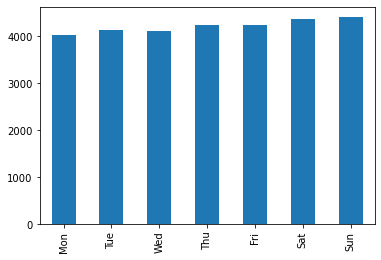

In [66]:
bf_5.plot(kind='bar')

## 연령대별 판매량 그래프

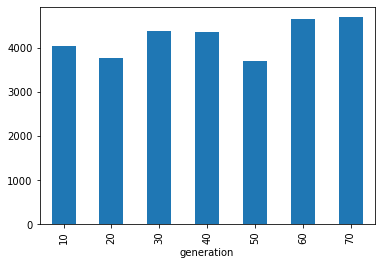

In [67]:
df6 = df.groupby('generation').sum()['quantity']
af6 = df6.plot(kind='bar')

# 2. 인사이트 설정 : df2

In [68]:
df2 = df.copy()

In [69]:
df2.head(3)

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2020-08-08,Sat,18,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2020,8,8
1,2021-06-17,Thr,13,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2021,6,17
2,2020-01-14,Tue,22,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,43,2.767513,3.0,40,2020,1,14


## 인사이트 1) 나이별 거래 빈도 조정

In [70]:
age_li = []
for i in range(10,80):
    if i < 20 :
        for j in range(300): # 
            age_li.append(i)
    elif i< 30 :
        for j in range(400): # 
            age_li.append(i)
    elif i < 40 :
        for j in range(400): # 
            age_li.append(i)
    elif i < 50 :
        for j in range(200): # 
            age_li.append(i)
    elif i < 60 :
        for j in range(100): #  
            age_li.append(i)
    elif i < 70 :
        for j in range(100): #  
            age_li.append(i)
    else :
        for j in range(50): # 
            age_li.append(i)
        
age=np.random.choice(age_li,size=10000)
df2['age'] = age
df2['generation'] = (df2['age']//10)*10

In [71]:
df2.age.describe()

count    10000.000000
mean        34.135500
std         16.314293
min         10.000000
25%         22.000000
50%         32.000000
75%         43.000000
max         79.000000
Name: age, dtype: float64

## 인사이트 2) 날짜별 거래 빈도 조정

In [72]:
###### 21년도 2분기 조류독감 발생으로 인한 거래 감소 ######
date_li = []
for i in pd.date_range('2020-01-01','2021-12-31',freq='D'):
    if i in pd.date_range('2020-01-01','2020-03-31',freq='D') :
        for j in range(4): 
            date_li.append(i)
    elif i in pd.date_range('2020-04-01','2020-06-30',freq='D') :
        for j in range(4): 
            date_li.append(i)
    elif i in pd.date_range('2020-07-01','2020-09-30',freq='D') :
        for j in range(4): 
            date_li.append(i)
    elif i in pd.date_range('2020-10-01','2020-12-31',freq='D') :
        for j in range(4): 
            date_li.append(i)
    elif i in pd.date_range('2021-01-01','2021-03-31',freq='D') :
        for j in range(4): 
            date_li.append(i)
    elif i in pd.date_range('2021-04-01','2021-06-30',freq='D') :
        for j in range(1): 
            date_li.append(i)
    elif i in pd.date_range('2021-07-01','2021-09-30',freq='D') :
        for j in range(2): 
            date_li.append(i)
    else :
        for j in range(3): 
            date_li.append(i)

In [73]:
len(date_li)

2375

## 인사이트 3) 평일/주간 거래 빈도 조정

In [74]:
## 주말 거래 빈도 조정 ######
weekend_fri = pd.date_range('2020-01-01','2021-12-31',freq='W-FRI')
weekend_sat = pd.date_range('2020-01-01','2021-12-31',freq='W-SAT')
weekend_sun = pd.date_range('2020-01-01','2021-12-31',freq='W-SUN')

for i in range(4):
    date_li.extend(weekend_fri)
    date_li.extend(weekend_sat)
    date_li.extend(weekend_sun)

In [75]:
len(date_li)

3627

In [76]:
df2['date']=np.random.choice(date_li,size=10000)

In [77]:
# 날짜(date) 파생 컬럼 수정
df2['Y'] = df2['date'].dt.year
df2['M'] = df2['date'].dt.month
df2['D'] = df2['date'].dt.day
df2['day']=df2['date'].apply(lambda x: x.weekday())         #date별 요일을 숫자로 나타냄
df2['day']=df2['day'].replace(list(range(7)),['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])

In [78]:
df2.head(3)

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2021-09-29,Wed,18,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,10,2.767513,3.0,10,2021,9,29
1,2020-08-30,Sun,13,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,24,2.767513,3.0,20,2020,8,30
2,2020-09-13,Sun,22,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,34,2.767513,3.0,30,2020,9,13


In [79]:
df2

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2021-09-29,Wed,18,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,10,2.767513,3.0,10,2021,9,29
1,2020-08-30,Sun,13,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,24,2.767513,3.0,20,2020,8,30
2,2020-09-13,Sun,22,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,34,2.767513,3.0,30,2020,9,13
3,2020-01-31,Fri,20,1.0,0.0,0.0,0.0,0.0,1,18000.00,18000.0,1038,0,12,2.767513,3.0,10,2020,1,31
4,2020-10-06,Tue,13,0.0,0.0,0.0,0.0,1.0,1,19000.00,19000.0,1038,0,47,2.767513,3.0,40,2020,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-02-10,Mon,17,0.0,1.0,0.0,1.0,0.0,2,19500.00,39000.0,1809,1,38,2.759861,3.0,30,2020,2,10
9996,2020-01-25,Sat,18,3.0,1.0,0.0,2.0,1.0,7,18857.14,132000.0,1809,1,33,2.759861,3.0,30,2020,1,25
9997,2021-11-24,Wed,17,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1809,1,25,2.759861,3.0,20,2021,11,24
9998,2021-06-09,Wed,13,0.0,1.0,0.0,0.0,0.0,1,19000.00,19000.0,1809,1,39,2.759861,3.0,30,2021,6,9


# 3. 인사이트 확인 : df3

## 인사이트 1) 나이별 거래

In [80]:
df3 = df2.copy()
df3.head(2)

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2021-09-29,Wed,18,0.0,0.0,0.0,1.0,0.0,1,20000.0,20000.0,1038,0,10,2.767513,3.0,10,2021,9,29
1,2020-08-30,Sun,13,0.0,0.0,1.0,0.0,0.0,1,20000.0,20000.0,1038,0,24,2.767513,3.0,20,2020,8,30


In [81]:
gr = df3.groupby('Y')

In [82]:
df3_20 = gr.get_group(2020)
df3_21 = gr.get_group(2021)

In [83]:
df3_20 = df3_20[['generation','quantity','price','amount']]
df3_21 = df3_21[['generation','quantity','price','amount']]

In [84]:
gr_20 = df3_20.groupby('generation')
gr_21 = df3_21.groupby('generation')

In [85]:
a=gr_20.agg({'quantity':'sum','amount':'sum'})
b=gr_21.agg({'quantity':'sum','amount':'sum'})

In [86]:
a = a.rename(columns={'quantity':'qnt20','amount':'amt20'})
b = b.rename(columns={'quantity':'qnt21','amount':'amt21'})

In [87]:
df_4 = pd.merge(a,b,on='generation', how='inner')

In [88]:
df_4['sales'] = np.where(df_4.amt20 < df_4.amt21,1,0)

In [89]:
df_4

,qnt20,amt20,qnt21,amt21,sales
generation,,,,,
10,3380,64899000.0,2340,44936000.0,0
20,4211,80865000.0,3305,63445000.0,0
30,4210,80817000.0,3260,62643000.0,0
40,2184,41966000.0,1758,33777000.0,0
50,1156,22216000.0,935,17937000.0,0
60,1165,22343000.0,733,14055000.0,0
70,526,10094000.0,404,7762000.0,0


## 나이대별 주문 수량

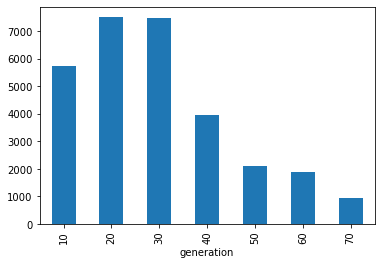

In [90]:
df6 = df2.groupby('generation').sum()['quantity']
af6 = df6.plot(kind='bar')

## 인사이트3) 평일/주말별 거래

In [91]:
df2.head()

,date,day,time,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2021-09-29,Wed,18,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,10,2.767513,3.0,10,2021,9,29
1,2020-08-30,Sun,13,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,24,2.767513,3.0,20,2020,8,30
2,2020-09-13,Sun,22,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,34,2.767513,3.0,30,2020,9,13
3,2020-01-31,Fri,20,1.0,0.0,0.0,0.0,0.0,1,18000.00,18000.0,1038,0,12,2.767513,3.0,10,2020,1,31
4,2020-10-06,Tue,13,0.0,0.0,0.0,0.0,1.0,1,19000.00,19000.0,1038,0,47,2.767513,3.0,40,2020,10,6


In [92]:
# date 인덱스로 요일별 거래량 확인 = df5
df5 = df2.set_index('date').groupby(lambda date:date.dayofweek).sum()['quantity']

In [93]:
df5

date
0    2745
1    2786
2    2618
3    2826
4    6101
5    6141
6    6350
Name: quantity, dtype: int32

In [94]:
Day_week=np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
Day_week

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='<U3')

In [95]:
df5.index=Day_week[df5.index]

<AxesSubplot:>

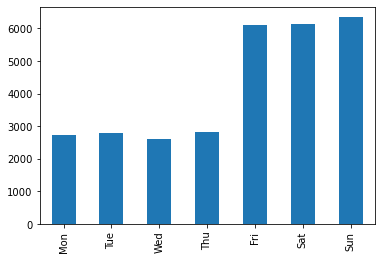

In [96]:
df5.plot(kind='bar')

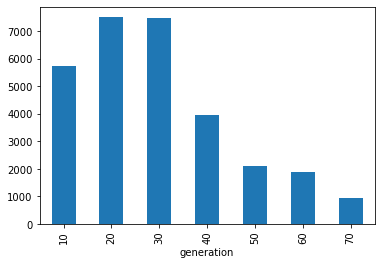

In [97]:
df6 = df2.groupby('generation').sum()['quantity']
af6 = df6.plot(kind='bar')
